In [1]:
import numpy as np
import pandas as pd
import numpy.random as rd

In [3]:
td=rd.rand(5,5,5)
# for i in td:
#     for it in i:
#         for ite in it:
#             print(ite)
print('five table five row in each table and 5 columns in each tables')
td.shape
# for 3d print one by one by elment

five table five row in each table and 5 columns in each tables


(5, 5, 5)

In [2]:
dataa=pd.read_csv('datetimeseries.csv')
dataa.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [35]:
dataa.Date.value_counts()

2019-01-24 06-AM    1
2019-01-07 09-AM    1
2019-10-15 09-AM    1
2017-10-14 01-AM    1
2019-09-11 11-AM    1
                   ..
2018-08-13 03-AM    1
2018-06-11 01-PM    1
2018-07-08 01-AM    1
2018-03-28 11-PM    1
2018-07-07 08-AM    1
Name: Date, Length: 23674, dtype: int64

In [36]:
dataa.shape

(23674, 7)

In [42]:
dataa.describe()
#symbol and date are a categorical column

,Open,High,Low,Close,Volume
count,23674.000000,23674.000000,23674.000000,23674.000000,2.367400e+04
mean,324.933372,327.317109,322.255521,324.926601,2.011035e+06
std,236.189068,238.539115,233.365042,236.192308,3.673646e+06
min,81.290000,82.000000,80.600000,81.290000,0.000000e+00
25%,171.522500,172.472500,170.500000,171.512500,3.993914e+05
50%,229.745000,231.725000,228.100000,229.725000,9.146454e+05
75%,402.797500,405.427500,400.030000,402.797500,2.098111e+06
max,1418.610000,1419.960000,1388.990000,1418.610000,8.569790e+07


In [6]:
dataa['Volume'].max()

85697897.38

In [9]:
dataa[['Date','Symbol']].dtypes

Date      object
Symbol    object
dtype: object

In [8]:
dataa.describe(exclude=[np.number])
# i am describing all object columns

,Date,Symbol
count,23674,23674
unique,23674,1
top,2018-12-19 01-AM,ETHUSD
freq,1,23674


In [40]:
len(dataa.columns)

7

In [55]:
dataa.High.var()

56900.90940069221

In [56]:
dataa.High.mean()

327.3171086423925

In [13]:
dataa.High.std()

238.53911503292747

In [15]:
dataa['High'].describe()

count    23674.000000
mean       327.317109
std        238.539115
min         82.000000
25%        172.472500
50%        231.725000
75%        405.427500
max       1419.960000
Name: High, dtype: float64

# standard divition
<b>var-mean=standard divition</b>

In [54]:
stddiv=(dataa.High.var())-(dataa.High.mean())
stddiv

56573.59229204982

In [9]:
dataa.head(2)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09


In [8]:
dataa.std(numeric_only=True)

Open      2.361891e+02
High      2.385391e+02
Low       2.333650e+02
Close     2.361923e+02
Volume    3.673646e+06
dtype: float64

## pivot tables

In [15]:
dataa.pivot_table(index=['Date'],values=['High','Low','Open','Close']).head()

,Close,High,Low,Open
Date,,,,
2017-07-01 01-PM,268.79,274.93,265.00,274.83
2017-07-01 02-PM,265.74,269.90,265.00,268.79
2017-07-01 03-PM,272.57,272.74,265.00,265.74
2017-07-01 04-PM,268.00,272.57,267.60,272.57
2017-07-01 05-PM,263.51,268.44,262.39,268.00


In [19]:
dataa.pivot_table(index='Date',values=['High','Low','Open','Close'],columns='Symbol')

,Close,High,Low,Open
Symbol,ETHUSD,ETHUSD,ETHUSD,ETHUSD
Date,,,,
2017-07-01 01-PM,268.79,274.93,265.00,274.83
2017-07-01 02-PM,265.74,269.90,265.00,268.79
2017-07-01 03-PM,272.57,272.74,265.00,265.74
2017-07-01 04-PM,268.00,272.57,267.60,272.57
2017-07-01 05-PM,263.51,268.44,262.39,268.00
...,...,...,...,...
2020-03-13 09-AM,133.80,136.53,126.62,127.12
2020-03-13 10-AM,132.60,134.99,128.90,133.80


In [20]:
dataa.pivot_table(index='Date',values=['High','Low','Open','Close'],columns='Symbol').isnull().sum()

       Symbol
Close  ETHUSD    0
High   ETHUSD    0
Low    ETHUSD    0
Open   ETHUSD    0
dtype: int64

In [11]:
pvt_tble=pd.pivot_table(dataa,index=['Date'],values=['High','Low','Open','Close'])
pvt_tble.sort_index(axis='rows',ascending=False)

,Close,High,Low,Open
Date,,,,
2020-03-13 12-PM,131.35,134.60,126.95,128.93
2020-03-13 12-AM,107.09,117.50,102.92,110.30
2020-03-13 11-AM,128.93,133.17,126.01,132.60
2020-03-13 10-AM,132.60,134.99,128.90,133.80
2020-03-13 09-AM,133.80,136.53,126.62,127.12
...,...,...,...,...
2017-07-01 05-PM,263.51,268.44,262.39,268.00
2017-07-01 04-PM,268.00,272.57,267.60,272.57
2017-07-01 03-PM,272.57,272.74,265.00,265.74


In [12]:
pvt_tble=pd.pivot_table(dataa,index=['Date'],values=['High','Low','Open','Close'])
pvt_tble.sort_index(axis='rows')

,Close,High,Low,Open
Date,,,,
2017-07-01 01-PM,268.79,274.93,265.00,274.83
2017-07-01 02-PM,265.74,269.90,265.00,268.79
2017-07-01 03-PM,272.57,272.74,265.00,265.74
2017-07-01 04-PM,268.00,272.57,267.60,272.57
2017-07-01 05-PM,263.51,268.44,262.39,268.00
...,...,...,...,...
2020-03-13 09-AM,133.80,136.53,126.62,127.12
2020-03-13 10-AM,132.60,134.99,128.90,133.80
2020-03-13 11-AM,128.93,133.17,126.01,132.60


In [55]:
df=pd.read_csv('data..csv')
df.head(2)

,country,country_code,year_week,level,region,region_name,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
0,Austria,AT,2020-W15,national,AT,Austria,1954.0,12339,8901064.0,138.623877,15.835967,Manual webscraping
1,Austria,AT,2020-W16,national,AT,Austria,773.0,58488,8901064.0,657.089984,1.321639,Manual webscraping


In [28]:
group=df.groupby(by='country')

In [33]:
group['region'].value_counts()['Austria']

region
AT      68
AT11    33
AT12    33
AT13    33
AT21    33
AT22    33
AT31    33
AT32    33
AT33    33
AT34    33
Name: region, dtype: int64

In [47]:
astr=group.get_group('Austria')
astr

,country,country_code,year_week,level,region,region_name,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
0,Austria,AT,2020-W15,national,AT,Austria,1954.0,12339,8901064.0,138.623877,15.835967,Manual webscraping
1,Austria,AT,2020-W16,national,AT,Austria,773.0,58488,8901064.0,657.089984,1.321639,Manual webscraping
2,Austria,AT,2020-W17,national,AT,Austria,479.0,33443,8901064.0,375.719128,1.432288,Manual webscraping
3,Austria,AT,2020-W18,national,AT,Austria,349.0,26598,8901064.0,298.818209,1.312129,Country website
4,Austria,AT,2020-W19,national,AT,Austria,249.0,42153,8901064.0,473.572598,0.590705,Country website
...,...,...,...,...,...,...,...,...,...,...,...,...
360,Austria,AT,2021-W26,subnational,AT34,Vorarlberg,20.0,244034,394297.0,61890.909640,0.008196,TESSy
361,Austria,AT,2021-W27,subnational,AT34,Vorarlberg,25.0,236708,394297.0,60032.919350,0.010562,TESSy
362,Austria,AT,2021-W28,subnational,AT34,Vorarlberg,93.0,149065,394297.0,37805.258470,0.062389,TESSy
363,Austria,AT,2021-W29,subnational,AT34,Vorarlberg,154.0,139190,394297.0,35300.801170,0.110640,TESSy


In [46]:
australia=df[df['country']=='Austria']

In [43]:
df[df['country']=='Austria']['region'].value_counts()

AT      68
AT13    33
AT22    33
AT21    33
AT31    33
AT12    33
AT33    33
AT32    33
AT34    33
AT11    33
Name: region, dtype: int64

## total sum of each region of Austria country

In [53]:
pd.pivot_table(astr,index='country',columns='region',values='new_cases',aggfunc=sum)

region,AT,AT11,AT12,AT13,AT21,AT22,AT31,AT32,AT33,AT34
country,,,,,,,,,,
Austria,627912.0,9846.0,62680.0,75576.0,23079.0,44341.0,53973.0,27203.0,26720.0,13097.0


In [81]:
pd.pivot_table(df,index='country',columns='level',values='new_cases',aggfunc=sum).reset_index()
# by defult aggfunc gives mean value
# and now we will going to remove all these null value by suitable value
# and again i will create pivot_table

level,country,national,subnational
0,Austria,627912.0,336515.0
1,Belgium,1129525.0,459758.0
2,Bulgaria,422421.0,NaN
3,Croatia,363787.0,196827.0
4,Cyprus,101565.0,NaN
5,Czechia,1673795.0,NaN
6,Denmark,318485.0,274653.0
7,Estonia,133438.0,NaN
8,Finland,107321.0,NaN
9,France,6146607.0,3925381.0


In [84]:
import seaborn as sns

In [104]:
newcase.mode()

0    0.0
dtype: float64

In [139]:
df['new_cases']=df.sort_values(by='new_cases')['new_cases'].fillna(df.sort_values(by='new_cases')['new_cases'].mean())
# newcase=newcase.fillna(newcase.mean())
# newcase.isnull().sum()


In [140]:
df['new_cases'].isnull().sum()

0

In [136]:
d=newcase.values
d

array([   0.        ,    0.        ,    0.        , ..., 6892.16073084,
       6892.16073084, 6892.16073084])

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_cases'>

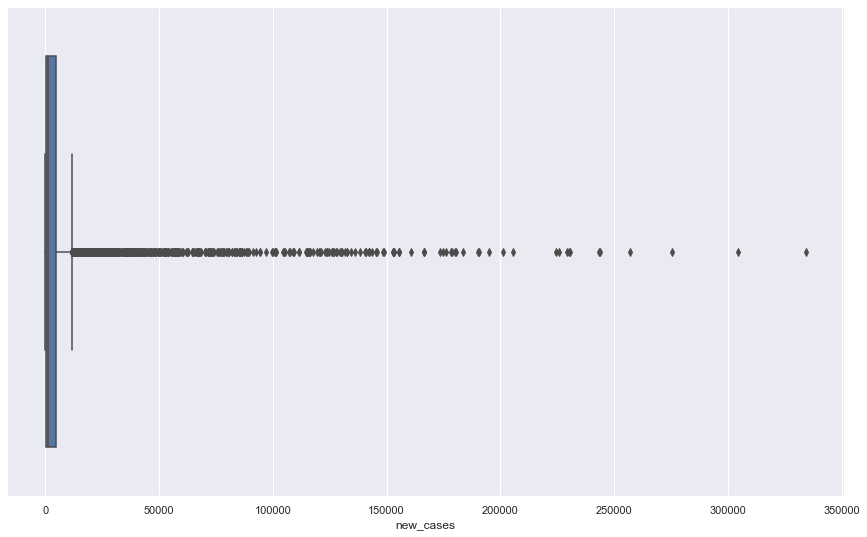

In [141]:
sns.boxplot(df['new_cases'])
# there is many outliers available

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='new_cases', ylabel='Density'>

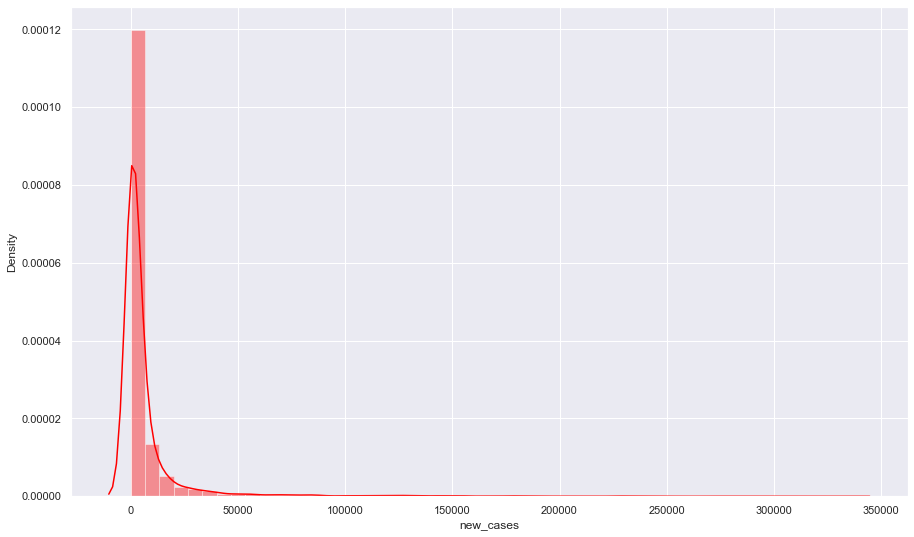

In [128]:
sns.set(rc={'figure.figsize':(15,9)})
sns.distplot(newcase,color='red')
# there is many outliers 

In [144]:
df['level'].isnull().sum()

0

In [145]:
pd.pivot_table(df,index='country',columns='level',values='new_cases',fill_value=1)

level,national,subnational
country,,
Austria,9234.000000,1133.047138
Belgium,15152.228810,5165.820225
Bulgaria,7037.920668,1.000000
Croatia,4604.898734,1468.858209
Cyprus,1485.714531,1.000000
Czechia,21187.278481,1.000000
Denmark,4031.455696,1373.265000
Estonia,1732.961039,1.000000
Finland,1293.024096,1.000000


In [151]:
pd.pivot_table(df,index='country',columns='level',values='tests_done',aggfunc=sum)
# and now we will proove why becoming none value in Bulgaria and in other columns

level,national,subnational
country,,
Austria,86190397.0,83083691.0
Belgium,17344776.0,9796471.0
Bulgaria,3536697.0,NaN
Croatia,2774639.0,1832772.0
Cyprus,9520375.0,NaN
Czechia,33131572.0,NaN
Denmark,75054820.0,70142374.0
Estonia,1522389.0,NaN
Finland,5942482.0,NaN


## why None value became prooved

In [161]:
print('you can see here why it become None value')
print('because it has only national level :-',df[df['country']=='Bulgaria'][['level','tests_done']]['level'].value_counts())

you can see here why it become None value
because it has only national level :- national    61
Name: level, dtype: int64
